<a href="https://colab.research.google.com/github/pumazzo/ML4HS-UC/blob/main/Notebook_1_ML4HS_UC2023_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to machine learning for health sciences
## Lesson 2 ***Supervised learning ***


In this notebook we will see (python):
- Import modules in Python
- A bit of coding
  - Lists, dictionary, array, loops, if statements
  - Save and load a file
  - Random number generation with Numpy
  - Plot a figure with Matplotlib




In this notebook we will see (ML):
- Logistic regression
- Decision (separation) curve
- Coefficient of the linear regression
-Training with a subsample of the dataset




The goal of this notebook is to generate a dummy dataset with Numpy. Then we will use the generated data to train a logistic regression model in SKlearn. We will never be too rigorous.
We will review a bit of python syntax.


In [1]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# A review of the syntax

myint = 1 # This is a variable. In python you don't have to declare the type on the variable before assigning a value to it
print("variable type : ", type(myint))
myfloat = 1.
print("variable type : ", type(myfloat))
mystring = "guido"
print("variable type : ", type(mystring))

variable type :  <class 'int'>
variable type :  <class 'float'>
variable type :  <class 'str'>


In [3]:
# We can change the type of a variable with a "casting" operation
# Use int() to convert a float to an integer
# Use float() to convert an integer to a float



In [4]:
# A list is an ordered ensamble of elements. Lists are used to store multiple items in a single variable.
# A list can contain element of different types
# We can declare a list with square brakets
# Already declared variables can be elements of a list

mylist = [42, 10. , mystring]

In [5]:
# We can access elements of the list with a number corresponding to the position of the element in the list (an index)
# indices must ve integer
# The first element of the list correspond to the zero index
#

print("The first element of the list is :", mylist[0])

# We can use a variable as an index

print("L'elemento della lista che corrisponde all'intero contenuto nella variabile myint = {}\n è questo : mylist[myint] = {}".format(myint,mylist[myint]))

The first element of the list is : 42
L'elemento della lista che corrisponde all'intero contenuto nella variabile myint = 1
 è questo : mylist[myint] = 10.0


In [6]:
## Print the second element of mylist

In [7]:
# We can not use a float an index. The try/catch block will execute the command in try. If it fails (it raise an error) then catch is executed

try:
  print(mylist[myfloat])# questo comando darà un errore e si eseguirà il contenuto di except!
  print("try - executed without errors")
except:
  print("An exception occurred. We are using a float as an index")



An exception occurred. We are using a float as an index


In [8]:
##################################################
# Run the previous cell again adding a cast -- Use int()
#################################################

In [9]:
# An operator. Il "+"

somma = myfloat + myint
print("The sum of a int and a float is a float : ",somma)

The sum of a int and a float is a float :  2.0


In [10]:
# An operator can change if it is applied to variables with other types
# the + is a concatenation if used with strings or lists
print("la mia lista concatenata ", mylist + ["a", "b"," c"])

la mia lista concatenata  [42, 10.0, 'guido', 'a', 'b', ' c']


### An introduction to Numpy. Mathematical and matrix operations
- Create an array
- Sum of a scalar and an array
- Operation between arrays

In [11]:
#  Create an array wit Numpy
# We can create an array from a list
myarray = np.array([1,2,3,4])
print("My array is  = {}, type : {}".format(myarray,type(myarray)))

My array is  = [1 2 3 4], type : <class 'numpy.ndarray'>


In [12]:
#array operation and an example of a method
myarray.sum()

10

In [13]:
# We can see the "dimentions" of an array with the command "shape"
print("array shape : ",myarray.shape)
# The array is a vector (1D) with 4 elements
#We can access elements with an index as we do for lists
print("the second element of the list is : ",myarray[1])
# We can modify the elements of the array
myarray[-1]=0#  -1 means the last element
print("my modified array = {}, type : {}".format(myarray,type(myarray)))

array shape :  (4,)
the second element of the list is :  2
my modified array = [1 2 3 0], type : <class 'numpy.ndarray'>


In [14]:
# We can define a multidimentional array (matix (2D) or tensor (3D+))
mymat = np.ones((4,4)) # 4 rows e 4 columns
print("mymat :\n", mymat)
print("mymat shape : ",(mymat.shape))

mymat :
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
mymat shape :  (4, 4)


In [15]:
# sum a number to each element of the array
sumWithScalar = myarray + 1
print(sumWithScalar)

[2 3 4 1]


In [16]:
#### try to do the same for a list


In [17]:
# scalar multiplication
prodWithScalar = myarray * 2
print(prodWithScalar)

[2 4 6 0]


In [18]:
#matrix product
print(mymat@myarray)


[6. 6. 6. 6.]


In [19]:
#trasposition
myarray.reshape(1,-1)

array([[1, 2, 3, 0]])

In [20]:
# multiplication matrix array and broadcasting
print("along rows")
print(mymat*myarray)
print("along columns")
print(mymat*myarray.reshape(-1,1))

along rows
[[1. 2. 3. 0.]
 [1. 2. 3. 0.]
 [1. 2. 3. 0.]
 [1. 2. 3. 0.]]
along columns
[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]]


In [21]:
#concatenation -> add an array (or a matrix) as additional columns or rows
# expand dims produce a singleton dimention to allow a correct broadcasting
# la dim =0 sono le righe
# la dim 1 sono le colonne
np.concatenate([mymat,np.expand_dims(myarray,0)],axis=0)#sotto

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 2., 3., 0.]])

In [22]:
np.concatenate([mymat,np.expand_dims(myarray,1)],axis=1)#a destra

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 3.],
       [1., 1., 1., 1., 0.]])

### Now we will generate a matrix of random number
- sample two gaussian distribution with different mean (dim = 2)
- label points coming from each distribution
- plot the data
- save the dataset

In [23]:
Npoints= 1000
D = 2

mu1 = np.array([3,2])
mu2  =np.array([1,-1])
cov1 = np.array([[3, 1], [1, 2]])

d1 =  np.random.randn(Npoints, D)@ np.linalg.cholesky(cov1) + mu1
d2 = 2*np.random.randn(Npoints, D) + mu2

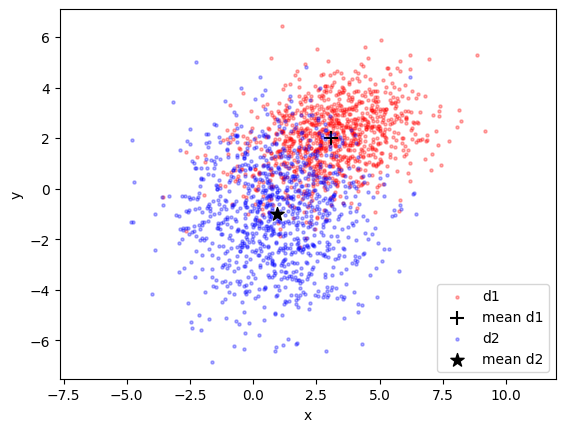

In [24]:
f,ax = plt.subplots(1)
ax.scatter(d1[:,0],d1[:,1],s=5,alpha=0.3,color="r",label="d1")
ax.scatter(d1[:,0].mean(),d1[:,1].mean(),s=100,alpha=1,marker="+",color="k",label="mean d1")
ax.scatter(d2[:,0],d2[:,1],s=5,alpha=0.3,color="b",label="d2")
ax.scatter(d2[:,0].mean(),d2[:,1].mean(),s=100,alpha=1,marker="*",color="k",label="mean d2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis('equal')
plt.legend()

In [25]:
# concatenate data from the two distribution in a single array
data= np.concatenate([d1,d2],axis=0)
labels = np.concatenate([np.zeros(Npoints),np.ones(Npoints)],axis=0)
print("data shape : ", data.shape)
print("label shape : ", labels.shape)
# now data/labels pair is our dummy dataset that will be used to tarin/test the model

data shape :  (2000, 2)
label shape :  (2000,)


In [26]:
np.savez("nydata.npz",data=data,labels=labels)# an example on how to save in numpy

In [27]:
from sklearn.model_selection import train_test_split# check the documentation for this one
# train test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)

print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (1340, 2)
y_train shape :  (1340,)
X_test shape :  (660, 2)
y_test shape :  (660,)


In [41]:
from sklearn.linear_model import LogisticRegression
#
clf = LogisticRegression()#define the model with default parameter (for now)


clf.fit(X_train, y_train)# train the model


LogisticRegression()

In [42]:
clf.score(X_test, y_test)

0.853030303030303

In [43]:
print("coeff of the linear regression", clf.coef_)

coeff of the linear regression [[-0.47802004 -0.94295331]]


In [44]:
# generate a line, defined as slope and intercept from the learned parameter
# p=0.5 when y = 0 (there is a sigmoid)
# y = 0 = a1x1+ a2x2 + b
# find for x2 = m x1 + c
a1,a2 = clf.coef_[0]
b = clf.intercept_
m=-a1/a2
c=-b/a2
t=np.linspace(-4,6,100)

In [45]:
pred_class = clf.predict(X_test)

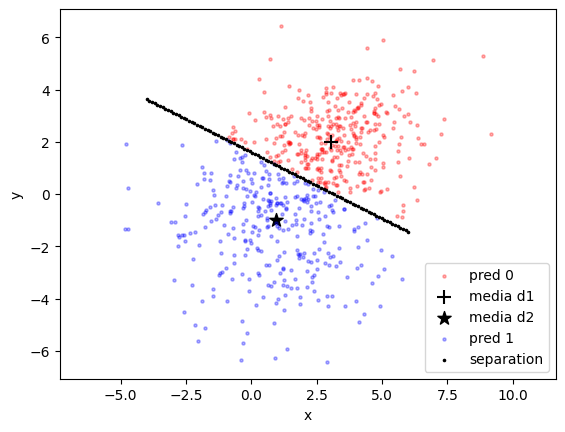

In [46]:

f,ax = plt.subplots(1)
ax.scatter(X_test[pred_class==0,0],X_test[pred_class==0,1],s=5,alpha=0.3,color="r",label="pred 0")
ax.scatter(d1[:,0].mean(),d1[:,1].mean(),s=100,alpha=1,marker="+",color="k",label="mean d1")
ax.scatter(d2[:,0].mean(),d2[:,1].mean(),s=100,alpha=1,marker="*",color="k",label="mean d2")
ax.scatter(X_test[pred_class==1,0],X_test[pred_class==1,1],s=5,alpha=0.3,color="b",label="pred 1")
# plot the decision curve
ax.scatter(t,m*t+c,s=10,alpha=1,marker=".",color="k",label="separation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis('equal')
plt.legend()



In [36]:
# the decision line is made from point that the model will predinc with p=0.5
clf.predict_proba(np.concatenate([np.expand_dims(t,axis=1),np.expand_dims(m*t+c,axis=1)],axis=1))# probability of the separatioon line

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

# Additional material if we have time
## train on a subsample of the data

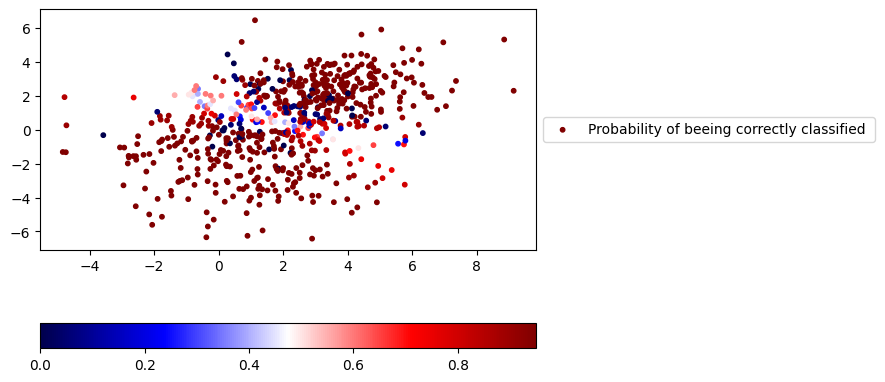

In [47]:
pred_class = np.zeros(y_test.shape)
f,ax = plt.subplots(1)
n_fold = 20
for i  in range(n_fold-1):
  start = int(i*(Npoints/n_fold))
  stop = int((i+1)*(Npoints/n_fold))
  X_fold = X_train[start:stop,:]
  y_fold = y_train[start:stop]
  clf = LogisticRegression(random_state=0).fit(X_fold, y_fold)
  a1,a2 = clf.coef_[0]
  b = clf.intercept_
  m=-a1/a2
  c=-b/a2
  t=np.linspace(-4,6,100)
  is_correct = clf.predict(X_test) == y_test
  pred_class += is_correct

  acc=np.round(clf.score(X_test, y_test),2)
  #ax.scatter(t,m*t+c,s=10,alpha=0.2,marker=".",label="separation Fold {} - acc {}".format(i,acc))


pred_class/=n_fold
#pred_class = pred_class+1
im = ax.scatter(X_test[:,0],X_test[:,1],s=10,alpha=1,c=pred_class,label="Probability of beeing correctly classified ",cmap="seismic")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f.colorbar(im, orientation="horizontal", pad=0.2)

(array([ 58.,  12.,   7.,   8.,  11.,  12.,  16.,  15.,  46., 475.]),
 array([0.   , 0.095, 0.19 , 0.285, 0.38 , 0.475, 0.57 , 0.665, 0.76 ,
        0.855, 0.95 ]),
 <BarContainer object of 10 artists>)

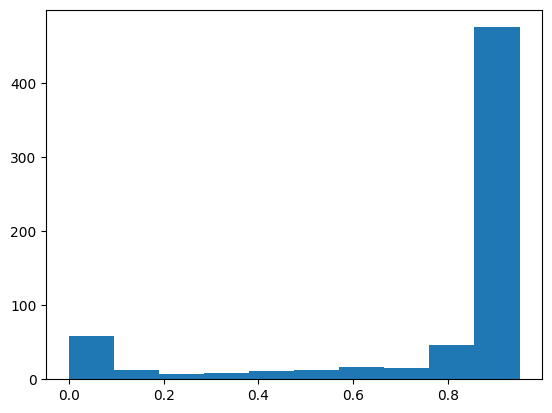

In [38]:
plt.hist(pred_class)